In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
from sklearn.metrics import confusion_matrix
from collections import Counter

%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 10)

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Load the various data points
names = {0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}
classes = [names[c] for c in names]
data = pickle.load(file('basecomp.pkl','r'))

In [3]:
# Transform the data from raw predictions to votes and to the final decision
numOfRecs = 10000
passes = 10
results = {}
preds = []
for x in range(0,numOfRecs):
    results[x] = {}

val = 0

for x in range(0, rec_len * passes, rec_len):
    # Get the highest prob. from each prediction using argmax
    thisBatch = [np.argmax(n, 0) for n in data['pred'][x : x + rec_len]]
    cntr = 0
    # Store each prediction in the right spot in our results 
    for thisNode in thisBatch:
        results[cntr][x/rec_len] = thisNode 
        cntr += 1

# Condense the results by getting the prediction w the most votes.
for r in results:
    j = []
    for i in results[r]:
        j.append(results[r][i])
    preds.append(Counter(j).most_common()[0][0])

In [4]:
# Reshape the actual label values
act = data['act'][:10000]
# Calculate the accuracy
acc = sum(np.equal(preds, act).astype(int)) / (len(act) * 1.)
print('The final test accuracy was {}').format(acc * 100)

Confusion matrix, without normalization
[[921   5  13   9   4   2   3   6  24  13]
 [ 19 900   0   2   0   0   4   1   8  66]
 [ 54   1 729  59  88   8  40  10   5   6]
 [ 17   1  26 771  61  47  25  21  10  21]
 [  7   0  15  30 910   1  12  22   2   1]
 [ 11   2  21 177  58 665  17  36   5   8]
 [  6   1  17  38  59   3 865   4   4   3]
 [ 11   1   6  37  51   7   1 883   1   2]
 [ 68   6   6   5   2   0   4   5 884  20]
 [ 21  21   2  11   3   0   0   2   6 934]]
Normalized confusion matrix
[[ 0.92  0.01  0.01  0.01  0.    0.    0.    0.01  0.02  0.01]
 [ 0.02  0.9   0.    0.    0.    0.    0.    0.    0.01  0.07]
 [ 0.05  0.    0.73  0.06  0.09  0.01  0.04  0.01  0.01  0.01]
 [ 0.02  0.    0.03  0.77  0.06  0.05  0.03  0.02  0.01  0.02]
 [ 0.01  0.    0.01  0.03  0.91  0.    0.01  0.02  0.    0.  ]
 [ 0.01  0.    0.02  0.18  0.06  0.67  0.02  0.04  0.01  0.01]
 [ 0.01  0.    0.02  0.04  0.06  0.    0.86  0.    0.    0.  ]
 [ 0.01  0.    0.01  0.04  0.05  0.01  0.    0.88  0.    0. 

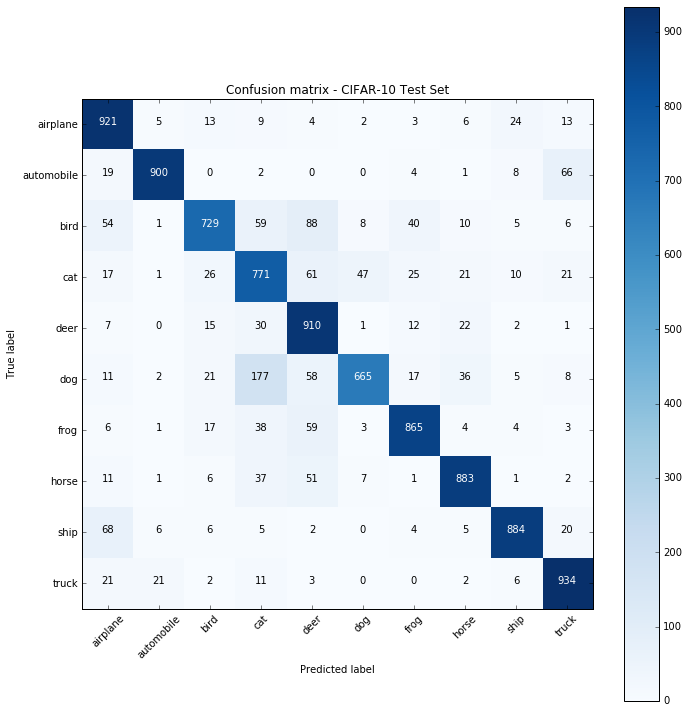

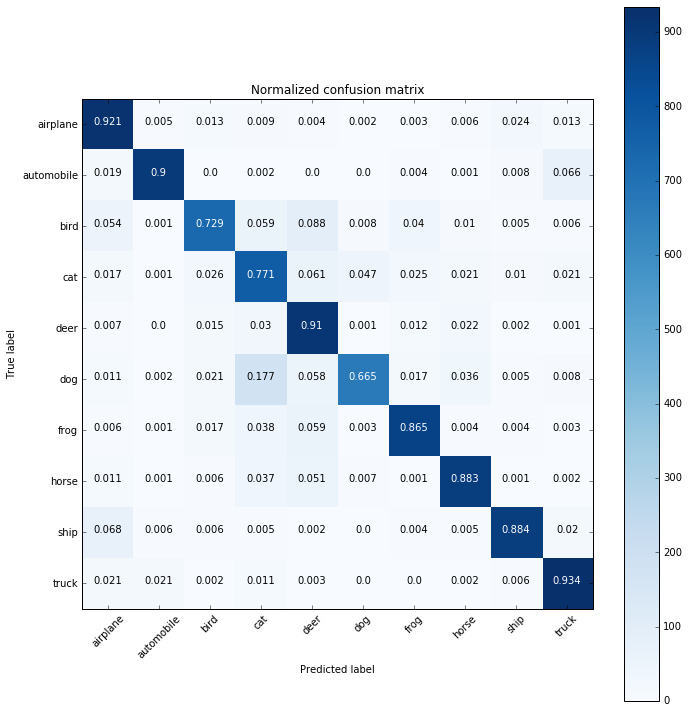

In [6]:
# Render the plot, borrowing heavily from the scikit team's example (awesome results)
# scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Compute confusion matrix
cnf_matrix = confusion_matrix(act, preds)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes,
                      title='Confusion matrix - CIFAR-10 Test Set')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes, normalize=True,
                      title='Normalized confusion matrix')

In [30]:
# Now pull some examples of the confused images.
from PIL import Image
imgs = pickle.load(file('./Ver/test_batch','r'))

In [33]:
comparison = zip(act, preds)
confusion = [1, 9]
examples = []
for i in range(0,len(comparison)):
    if comparison[i][0] == confusion[0] and comparison[i][1] == confusion[1]:
        examples.append(i)
        
print('There were {} examples of an {} classified as a {}'.format(len(examples), names[confusion[0]], names[confusion[1]]))


There were 66 examples of an automobile classified as a truck


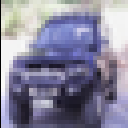

In [47]:
Image.fromarray(np.array(imgs['data'][examples[0]]).reshape([32,32,3], order='F')).resize((128,128)).rotate(270)

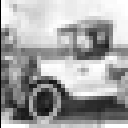

In [48]:
Image.fromarray(np.array(imgs['data'][examples[1]]).reshape([32,32,3], order='F')).resize((128,128)).rotate(270)

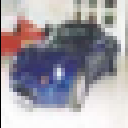

In [49]:
Image.fromarray(np.array(imgs['data'][examples[2]]).reshape([32,32,3], order='F')).resize((128,128)).rotate(270)

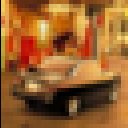

In [50]:
Image.fromarray(np.array(imgs['data'][examples[3]]).reshape([32,32,3], order='F')).resize((128,128)).rotate(270)

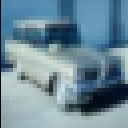

In [51]:
Image.fromarray(np.array(imgs['data'][examples[4]]).reshape([32,32,3], order='F')).resize((128,128)).rotate(270)